<a href="https://colab.research.google.com/github/syamkrishnanharidas/DATA_ANALYTICS_PYTHON_ASSIGNMENT/blob/main/INTERMEDIATE_ASSESSMENT_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [90]:
df_train = pd.read_csv('/drive/MyDrive/Colab Notebooks/ASSIGNMENT/IA02/train_LZdllcl.csv',index_col='employee_id')
df_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54808 entries, 65438 to 51526
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.9+ MB


In [10]:
df_train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [11]:
df_train.isna().sum()

,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0
KPIs_met >80%,0


In [12]:
df_train['department'].nunique()

9

In [13]:
df_train['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [14]:
df_train['region'].nunique()

34

In [15]:
df_train['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [16]:
df_train['education'].nunique()

3

In [17]:
df_train['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [18]:
df_train['gender'].nunique()

2

In [19]:
df_train['gender'].unique()

array(['f', 'm'], dtype=object)

In [20]:
df_train['recruitment_channel'].nunique()

3

In [21]:
df_train['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [91]:
df_train.drop_duplicates(inplace=True)
df_train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0


In [92]:
df_train.duplicated().sum()

0

In [93]:
# Encode Categorical columns:  1. Nominal categories (no rank/order)             2. Ordinal Ctegories (rank/order)
cat_col = ['department', 'region', 'education', 'gender','recruitment_channel']
# for tree based ML :  go for LabelEncoder
for col in cat_col:
  print(f"Distribution in {col} is: ")
  print(df_train[col].value_counts())
# for non-tree : go for OneHot Encoding

Distribution in department is: 
department
Sales & Marketing    16789
Operations           11319
Technology            7131
Procurement           7131
Analytics             5341
Finance               2535
HR                    2413
Legal                 1032
R&D                    999
Name: count, dtype: int64
Distribution in region is: 
region
region_2     12311
region_22     6400
region_7      4838
region_15     2799
region_13     2643
region_26     2255
region_31     1930
region_4      1703
region_27     1654
region_16     1465
region_28     1318
region_11     1314
region_23     1174
region_29      992
region_32      943
region_19      873
region_20      846
region_14      827
region_25      817
region_17      796
region_5       765
region_6       689
region_30      655
region_8       654
region_10      648
region_1       610
region_24      507
region_12      498
region_9       418
region_21      411
region_3       346
region_34      291
region_33      269
region_18       31
Name: c

In [113]:
# creating one hot encoded features for working with non-tree based algorithms
df_train_nontree = pd.get_dummies(df_train,columns=cat_col,drop_first=False)
df_train_nontree.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_0,department_1,...,region_33,education_0,education_1,education_2,education_3,gender_0,gender_1,recruitment_channel_0,recruitment_channel_1,recruitment_channel_2
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,1,35,5.0,8,1,0,49,0,False,False,...,False,False,False,True,False,True,False,False,False,True
65141,1,30,5.0,4,0,0,60,0,False,False,...,False,True,False,False,False,False,True,True,False,False
7513,1,34,3.0,7,0,0,50,0,False,False,...,False,True,False,False,False,False,True,False,False,True
2542,2,39,1.0,10,0,0,50,0,False,False,...,False,True,False,False,False,False,True,True,False,False
48945,1,45,3.0,2,0,0,73,0,False,False,...,False,True,False,False,False,False,True,True,False,False


In [114]:
df_train_nontree.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54690 entries, 65438 to 51526
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   no_of_trainings        54690 non-null  int64  
 1   age                    54690 non-null  int64  
 2   previous_year_rating   54690 non-null  float64
 3   length_of_service      54690 non-null  int64  
 4   KPIs_met >80%          54690 non-null  int64  
 5   awards_won?            54690 non-null  int64  
 6   avg_training_score     54690 non-null  int64  
 7   is_promoted            54690 non-null  int64  
 8   department_0           54690 non-null  bool   
 9   department_1           54690 non-null  bool   
 10  department_2           54690 non-null  bool   
 11  department_3           54690 non-null  bool   
 12  department_4           54690 non-null  bool   
 13  department_5           54690 non-null  bool   
 14  department_6           54690 non-null  bool   
 15  dep

In [95]:
# apply Label Encoder to each of these features
from sklearn.preprocessing import LabelEncoder
#initialize the LabelEncoder
le = LabelEncoder()
#apply Label encoding to each categorical col
for col in cat_col:
  df_train[col] = le.fit_transform(df_train[col])
  #check the transformed col
df_train.head()
# This type of encoding cannot be used in linear models, SVM or neural networks as they expect data to be normalized

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [96]:
df_train['education'] = df_train['education'].fillna(df_train['education'].mode())

In [97]:
df_train['previous_year_rating'] = df_train['previous_year_rating'].fillna(df_train['previous_year_rating'].mean())

In [98]:
df_train.isna().sum()

,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0
KPIs_met >80%,0


In [99]:
df_test = pd.read_csv('/drive/MyDrive/Colab Notebooks/ASSIGNMENT/IA02/train_LZdllcl.csv',index_col='employee_id')
df_test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [100]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54808 entries, 65438 to 51526
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.9+ MB


In [101]:
df_test.isna().sum()

,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0
KPIs_met >80%,0


In [102]:
df_test.drop_duplicates(inplace=True)
df_test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [103]:
# creating one hot encoded features for working with non-tree based algorithms
df_test_nontree = pd.get_dummies(df_test,columns=cat_col,drop_first=False)
df_test_nontree.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,1,35,5.0,8,1,0,49,0,False,False,...,False,False,False,False,True,True,False,False,False,True
65141,1,30,5.0,4,0,0,60,0,False,False,...,False,False,True,False,False,False,True,True,False,False
7513,1,34,3.0,7,0,0,50,0,False,False,...,False,False,True,False,False,False,True,False,False,True
2542,2,39,1.0,10,0,0,50,0,False,False,...,False,False,True,False,False,False,True,True,False,False
48945,1,45,3.0,2,0,0,73,0,False,False,...,False,False,True,False,False,False,True,True,False,False


In [119]:
df_test_nontree.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54690 entries, 65438 to 51526
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               54690 non-null  int64  
 1   age                           54690 non-null  int64  
 2   previous_year_rating          50628 non-null  float64
 3   length_of_service             54690 non-null  int64  
 4   KPIs_met >80%                 54690 non-null  int64  
 5   awards_won?                   54690 non-null  int64  
 6   avg_training_score            54690 non-null  int64  
 7   is_promoted                   54690 non-null  int64  
 8   department_Analytics          54690 non-null  bool   
 9   department_Finance            54690 non-null  bool   
 10  department_HR                 54690 non-null  bool   
 11  department_Legal              54690 non-null  bool   
 12  department_Operations         54690 non-null  bool   
 13  de

In [104]:
# Encode Categorical columns:  1. Nominal categories (no rank/order)             2. Ordinal Ctegories (rank/order)
cat_col = ['department', 'region', 'education', 'gender','recruitment_channel']
# for tree based ML :  go for LabelEncoder
for col in cat_col:
  print(f"Distribution in {col} is: ")
  print(df_test[col].value_counts())
# for non-tree : go for OneHot Encoding

Distribution in department is: 
department
Sales & Marketing    16789
Operations           11319
Technology            7131
Procurement           7131
Analytics             5341
Finance               2535
HR                    2413
Legal                 1032
R&D                    999
Name: count, dtype: int64
Distribution in region is: 
region
region_2     12311
region_22     6400
region_7      4838
region_15     2799
region_13     2643
region_26     2255
region_31     1930
region_4      1703
region_27     1654
region_16     1465
region_28     1318
region_11     1314
region_23     1174
region_29      992
region_32      943
region_19      873
region_20      846
region_14      827
region_25      817
region_17      796
region_5       765
region_6       689
region_30      655
region_8       654
region_10      648
region_1       610
region_24      507
region_12      498
region_9       418
region_21      411
region_3       346
region_34      291
region_33      269
region_18       31
Name: c

In [105]:
# apply Label Encoder to each of these features
from sklearn.preprocessing import LabelEncoder
#initialize the LabelEncoder
le = LabelEncoder()
#apply Label encoding to each categorical col
for col in cat_col:
  df_test[col] = le.fit_transform(df_test[col])
  #check the transformed col
df_test.head()
# This type of encoding cannot be used in linear models, SVM or neural networks as they expect data to be normalized

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [106]:
df_test['education'] = df_test['education'].fillna(df_test['education'].mode())

In [107]:
df_test['previous_year_rating'] = df_test['previous_year_rating'].fillna(df_test['previous_year_rating'].mean())

In [108]:
df_test.isna().sum()

,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0
KPIs_met >80%,0


<Figure size 1000x1000 with 0 Axes>

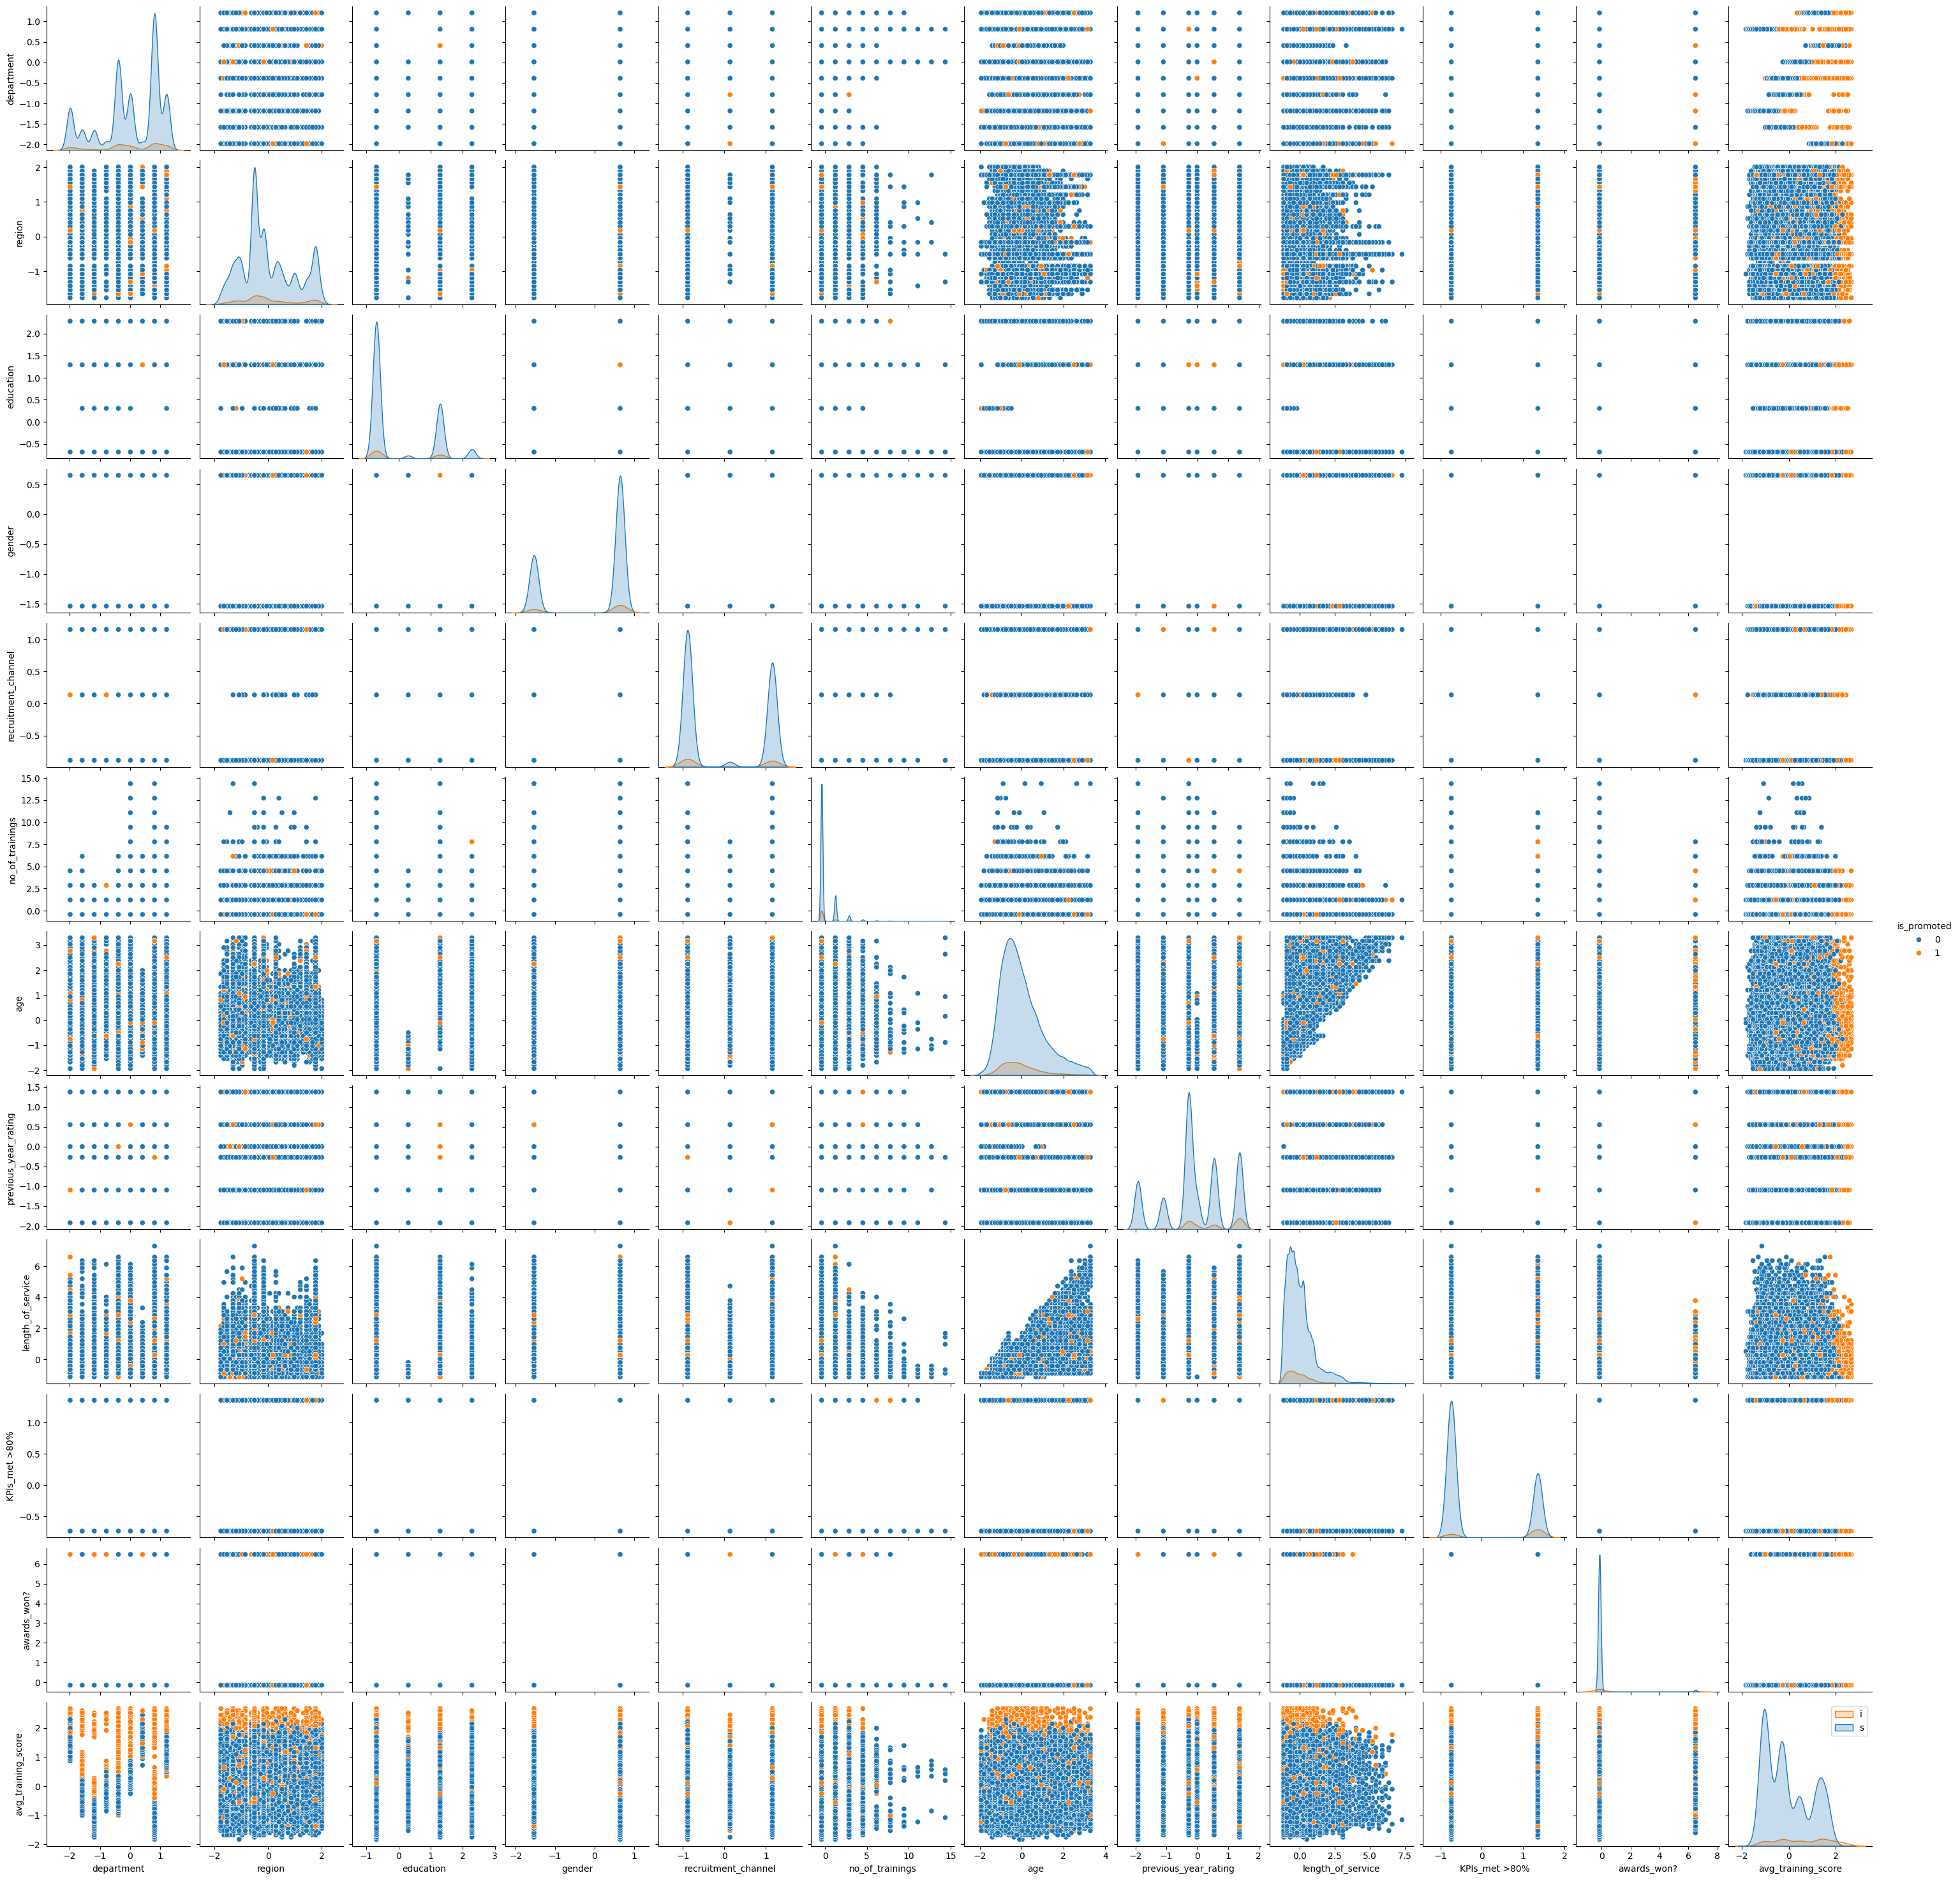

In [131]:
# pairplot ()  ==> plot multiple pairwise bivariate distributions in one go
plt.figure(figsize=(10,10))
sns.pairplot(data=df_train,hue='is_promoted')
plt.legend('is_promoted')
plt.show()

<ipython-input-295-38466df31a41>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train,x ='education',palette='viridis')


<Axes: xlabel='education', ylabel='count'>

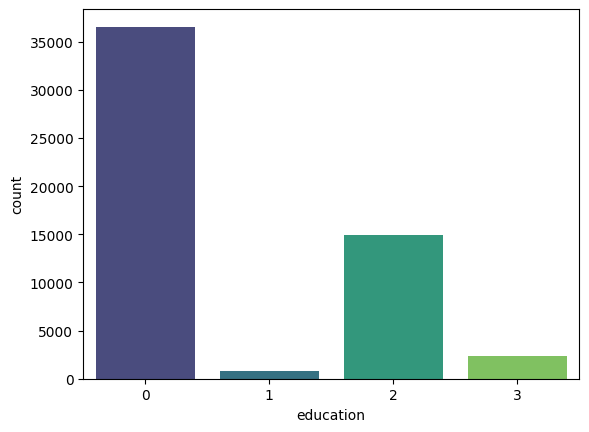

In [295]:
sns.countplot(data=df_train,x ='education',palette='viridis')

## Model preparation:

In [115]:
# split data into target and features :::   Non Tree models
X_train_nontree = df_train_nontree.drop('is_promoted',axis=1)
y_train_nontree = df_train_nontree['is_promoted']

In [120]:
X_test_nontree = df_test_nontree.drop('is_promoted',axis=1)
y_test_nontree = df_test_nontree['is_promoted']

In [122]:
from sklearn.model_selection import train_test_split
X_train_nontree, X_test_nontree, y_train_nontree, y_test_nontree = train_test_split(X_train_nontree, y_train_nontree, test_size=0.2,random_state=42)

In [117]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_nontree,y_train_nontree)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [123]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
y_pred  = lr.predict(X_test_nontree)
print(confusion_matrix(y_test_nontree,y_pred))
print(classification_report(y_test_nontree,y_pred))
print(accuracy_score(y_test_nontree,y_pred))

[[9926   60]
 [ 751  201]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      9986
           1       0.77      0.21      0.33       952

    accuracy                           0.93     10938
   macro avg       0.85      0.60      0.65     10938
weighted avg       0.92      0.93      0.91     10938

0.9258548180654599


## Naive BAyers Model

In [71]:
# uses the concept of conditional probability
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_nontree,y_train_nontree)
#predict
y_pred = gnb.predict(X_test_nontree)
#metrics
print(confusion_matrix(y_test_nontree,y_pred))
print(classification_report(y_test_nontree,y_pred))
print(accuracy_score(y_test_nontree,y_pred))

[[26822 23203]
 [ 1122  3543]]
              precision    recall  f1-score   support

           0       0.96      0.54      0.69     50025
           1       0.13      0.76      0.23      4665

    accuracy                           0.56     54690
   macro avg       0.55      0.65      0.46     54690
weighted avg       0.89      0.56      0.65     54690

0.555220332784787


In [72]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

y_pred  = lr.predict(X_test_nontree)

print(confusion_matrix(y_test_nontree,y_pred))
print(classification_report(y_test_nontree,y_pred))
print(accuracy_score(y_test_nontree,y_pred))

[[49712   313]
 [ 3746   919]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     50025
           1       0.75      0.20      0.31      4665

    accuracy                           0.93     54690
   macro avg       0.84      0.60      0.64     54690
weighted avg       0.91      0.93      0.91     54690

0.9257816785518377


# SVM MODEL

In [73]:
from sklearn.svm import SVC
svm_model=SVC(kernel='linear')
svm_model.fit(X_train_nontree,y_train_nontree)
y_pred=svm_model.predict(X_test_nontree)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_test_nontree, y_pred))
print('Precision is', precision_score(y_test_nontree, y_pred))
print('Recall is', recall_score(y_test_nontree, y_pred))
print('f1 score is', f1_score(y_test_nontree,y_pred))

Accuracy is 0.9266227829584933
Precision is 1.0
Recall is 0.1397642015005359
f1 score is 0.2452510814369005


# APPLY STANDARD SCALING

In [124]:
from sklearn.preprocessing import StandardScaler

num_col = ['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score']
scaler = StandardScaler()
# TRAIN DATASET
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,0.808905,1.775727,1.294076,-1.535543,1.154139,-0.41557,0.024034,1.378021,0.499019,1.356305,-0.154188,-1.076502,0
65141,-0.388070,-0.163164,-0.684371,0.651235,-0.885242,-0.41557,-0.628680,1.378021,-0.438780,-0.737297,-0.154188,-0.253968,0
7513,0.808905,-0.619374,-0.684371,0.651235,1.154139,-0.41557,-0.106508,-0.271791,0.264569,-0.737297,-0.154188,-1.001727,0
2542,0.808905,-0.049112,-0.684371,0.651235,-0.885242,1.22517,0.546205,-1.921604,0.967918,-0.737297,-0.154188,-1.001727,0
48945,1.207897,0.293045,-0.684371,0.651235,-0.885242,-0.41557,1.329462,-0.271791,-0.907679,-0.737297,-0.154188,0.718117,0


In [125]:
# TEST DATASET
df_test[num_col] = scaler.fit_transform(df_test[num_col])
df_test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,0.808905,1.775727,1.294076,-1.535543,1.154139,-0.41557,0.024034,1.378021,0.499019,1.356305,-0.154188,-1.076502,0
65141,-0.388070,-0.163164,-0.684371,0.651235,-0.885242,-0.41557,-0.628680,1.378021,-0.438780,-0.737297,-0.154188,-0.253968,0
7513,0.808905,-0.619374,-0.684371,0.651235,1.154139,-0.41557,-0.106508,-0.271791,0.264569,-0.737297,-0.154188,-1.001727,0
2542,0.808905,-0.049112,-0.684371,0.651235,-0.885242,1.22517,0.546205,-1.921604,0.967918,-0.737297,-0.154188,-1.001727,0
48945,1.207897,0.293045,-0.684371,0.651235,-0.885242,-0.41557,1.329462,-0.271791,-0.907679,-0.737297,-0.154188,0.718117,0


In [126]:
# split into X and Y
X_train = df_train.drop('is_promoted',axis=1)
y_train = df_train['is_promoted']
# plit into train and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [127]:
X_test = df_test.drop('is_promoted',axis=1)
y_test = df_test['is_promoted']

# DECISION TREE

In [128]:
# fit Decison Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_test)

print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))
print(accuracy_score(y_test,y_pred_dt))


[[50025     0]
 [   11  4654]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50025
           1       1.00      1.00      1.00      4665

    accuracy                           1.00     54690
   macro avg       1.00      1.00      1.00     54690
weighted avg       1.00      1.00      1.00     54690

0.9997988663375389


# RANDOM FOREST

In [129]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))


[[50022     3]
 [    8  4657]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50025
           1       1.00      1.00      1.00      4665

    accuracy                           1.00     54690
   macro avg       1.00      1.00      1.00     54690
weighted avg       1.00      1.00      1.00     54690

0.9997988663375389


# FEATURE EXTRACTION



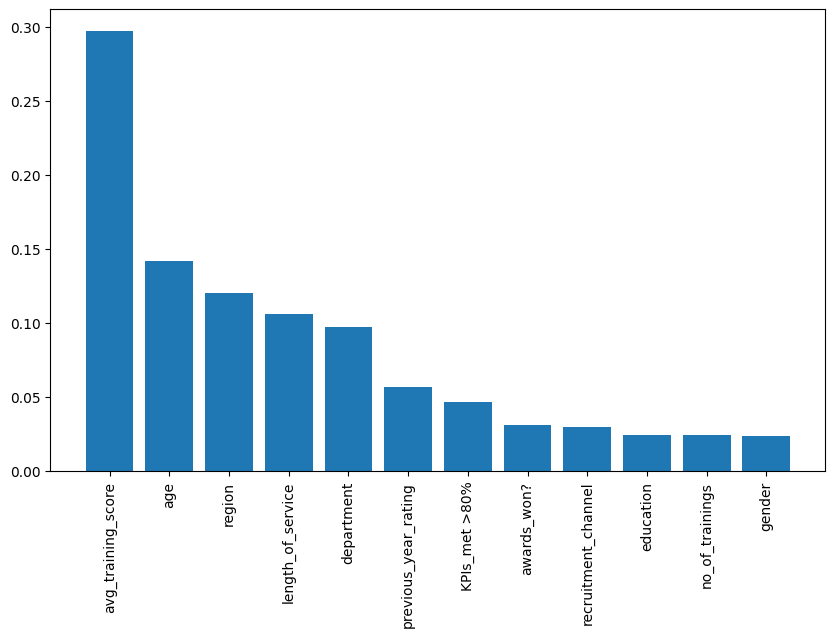

In [132]:
# get feature importance scores
importances = rf.feature_importances_
#sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
features = X_test.columns

#plot the feature importances
plt.figure(figsize=(10,6))
plt.bar(range(X_test.shape[1]),importances[indices],align='center')
plt.xticks(range(X_test.shape[1]),features[indices],rotation=90)
plt.show()

In [148]:
df_test

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,0.808905,1.775727,1.294076,-1.535543,1.154139,-0.41557,0.024034,1.378021,0.499019,1.356305,-0.154188,-1.076502,0
65141,-0.388070,-0.163164,-0.684371,0.651235,-0.885242,-0.41557,-0.628680,1.378021,-0.438780,-0.737297,-0.154188,-0.253968,0
7513,0.808905,-0.619374,-0.684371,0.651235,1.154139,-0.41557,-0.106508,-0.271791,0.264569,-0.737297,-0.154188,-1.001727,0
2542,0.808905,-0.049112,-0.684371,0.651235,-0.885242,1.22517,0.546205,-1.921604,0.967918,-0.737297,-0.154188,-1.001727,0
48945,1.207897,0.293045,-0.684371,0.651235,-0.885242,-0.41557,1.329462,-0.271791,-0.907679,-0.737297,-0.154188,0.718117,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,1.207897,-1.189637,-0.684371,0.651235,1.154139,-0.41557,1.721090,-0.271791,2.609066,-0.737297,-0.154188,1.091996,0
74592,-0.388070,0.407098,1.294076,-1.535543,-0.885242,-0.41557,0.285120,-1.096698,0.030120,-0.737297,-0.154188,-0.553072,0
13918,-1.984038,-1.759899,-0.684371,0.651235,-0.885242,-0.41557,-1.020308,1.378021,-0.673229,1.356305,-0.154188,1.166772,0


In [163]:
df_sol = pd.DataFrame(df_test['is_promoted'])
df_sol.head()

,is_promoted
employee_id,
65438,0
65141,0
7513,0
2542,0
48945,0


In [164]:
df_sol.to_csv('/drive/MyDrive/Colab Notebooks/ASSIGNMENT/IA02/sample_submission_M0L0uXE.csv')